* 진형님 LDA 참고하여 진행
* 동현님 gensim 파일 참고하여 진행

# 1. 데이터 로드

저장된 데이터 가져오기

In [2]:
import pandas as pd
import re

In [3]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 파일은 전처리 완료된 판례본문 / 판례이유 분리하여 열로 저장한 것
df_labor = pd.read_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real.csv', encoding='utf-8')

In [9]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례정보일련번호      5016 non-null   int64 
 1   사건번호          5016 non-null   object
 2   선고            5016 non-null   object
 3   판결유형          5016 non-null   object
 4   판시사항          3725 non-null   object
 5   판결요지          3054 non-null   object
 6   참조조문          3724 non-null   object
 7   참조판례          2450 non-null   object
 8   판례내용          5016 non-null   object
 9   판례내용_상단       5016 non-null   object
 10  판례내용_이유       5012 non-null   object
 11  판례내용_이유(전처리)  5016 non-null   object
dtypes: int64(1), object(11)
memory usage: 470.4+ KB


불용어 제거하기 

In [10]:
#한국어 처리를 의한 라이브러리 사용 
# Counter: 데이터를 카운팅하여 빈도수를 계산하기 위한 모듈, 주로 단어 빈도 계산에 사용
from collections import Counter

# konlpy의 Okt: 한국어 형태소 분석기. 텍스트를 형태소 단위로 분리하거나 품사 태깅에 사용
from konlpy.tag import Okt

# CountVectorizer: 문서에서 단어 빈도 수를 기반으로 피처 벡터를 생성하는 사이킷런의 도구
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\sorted_words.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1', 
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외']
pattern = r'제\d+|\d호증|\d호'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 불용어 제거 함수 (리스트 상태로 처리)
def remove_stopwords(content):
    # Okt 객체를 생성하여 형태소 분석
    okt = Okt()
    
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(content)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_labor['판례내용_제거(불용어)'] = df_labor['판례내용'].apply(remove_stopwords)

# 결과 확인
print(df_labor['판례내용_제거(불용어)'])

0       주식회사 ○○ 김소영 피상 중앙 노동 위원장 법무 법인 지향 김진 법무 법인 서희원...
1       피상 조창 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 한다 판시와 협력...
2       피상 명단 방광 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 지난 보충 ...
3       피상 법무 법인 금강 ○○○ 주식회사 김원정 주식회사 △△△ 법무 법인 유한 태평양...
4       법무 법인 창조 피상 대한민국 법무 법인 유한 세종 김주안 고법 연차 휴가 수당 주...
                              ...                        
5011    소선규 종로 세무서 1962.7 납세 고지서 의하여 1960년 기분 을종 근로 소득...
5012    피상 선정 한국 곡창 주식회사 부산 지방 대구 민공 한다 비용 부담 한다 김태 지상...
5013    재단법인 충청남도 관재 국장 소송비용 부담 한다 목록 부동산 임대차 계약 단기 42...
5014    피상 서울특별시 여객 자동차 운송 사업 조합 중앙 노동 본건 비용 부담 한다 의하면...
5015    인천 지원 본건 원판 노무 동원 징집 연기 청탁 받고 직무 하여 뇌물 수수하였다는 ...
Name: 판례내용_제거(불용어), Length: 5016, dtype: object


In [12]:
df_labor.to_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real_cleaned2.csv', index='False')

In [14]:
df_labor2 = pd.read_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real_cleaned2.csv')
df_labor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5016 non-null   int64 
 1   판례정보일련번호      5016 non-null   int64 
 2   사건번호          5016 non-null   object
 3   선고            5016 non-null   object
 4   판결유형          5016 non-null   object
 5   판시사항          3725 non-null   object
 6   판결요지          3054 non-null   object
 7   참조조문          3724 non-null   object
 8   참조판례          2450 non-null   object
 9   판례내용          5016 non-null   object
 10  판례내용_상단       5016 non-null   object
 11  판례내용_이유       5012 non-null   object
 12  판례내용_이유(전처리)  5016 non-null   object
 13  판례내용_제거(불용어)  5016 non-null   object
dtypes: int64(2), object(12)
memory usage: 548.8+ KB


판례내용 길이분포 확인

Text(0, 0.5, '빈도 수')

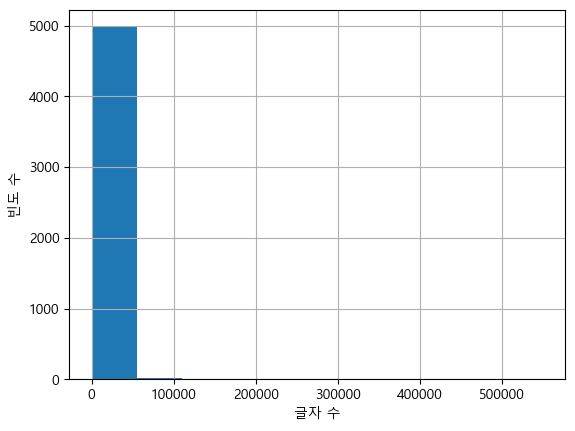

In [18]:
#글자 수 히스토그램
ax = df_labor['판례내용'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

Text(0, 0.5, '빈도 수')

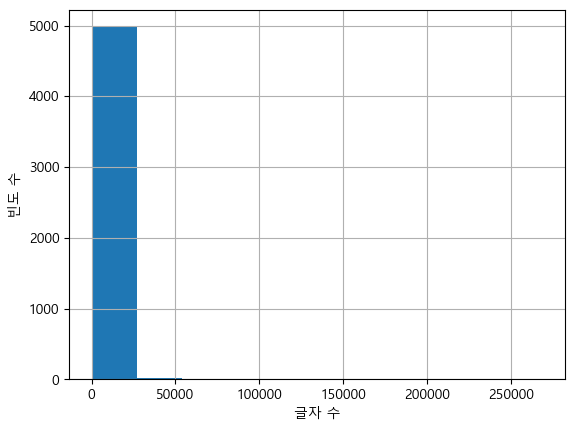

In [19]:
#글자 수 히스토그램
ax = df_labor['판례내용_제거(불용어)'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

토큰수 분포

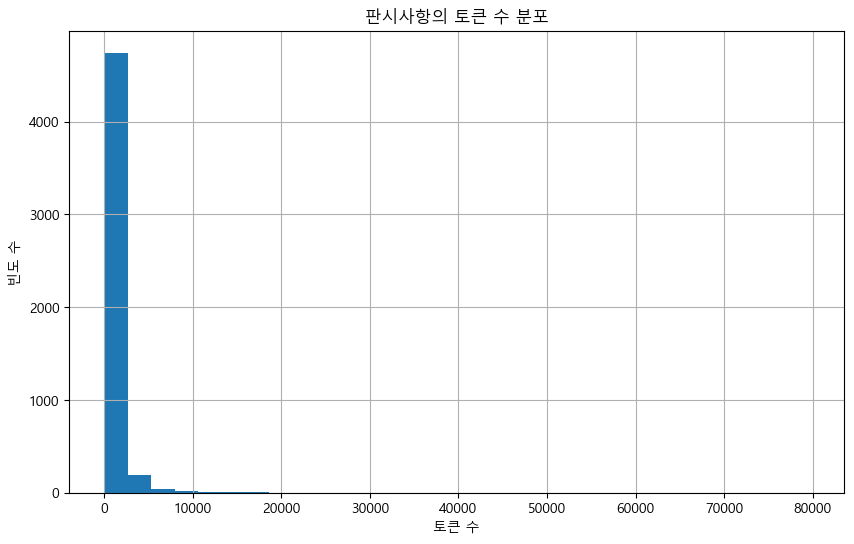

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 결측값을 빈 문자열로 채움
df_labor['판례내용_제거(불용어)'] = df_labor['판례내용_제거(불용어)'].fillna('없음')

# 문자열을 공백으로 분할하고, 각 리스트의 길이를 계산
token_counts = df_labor['판례내용_제거(불용어)'].str.split(' ').map(len)

# 히스토그램 그리기
ax = token_counts.hist(bins=30, figsize=(10,6))
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')
ax.set_title('판시사항의 토큰 수 분포')
plt.show()

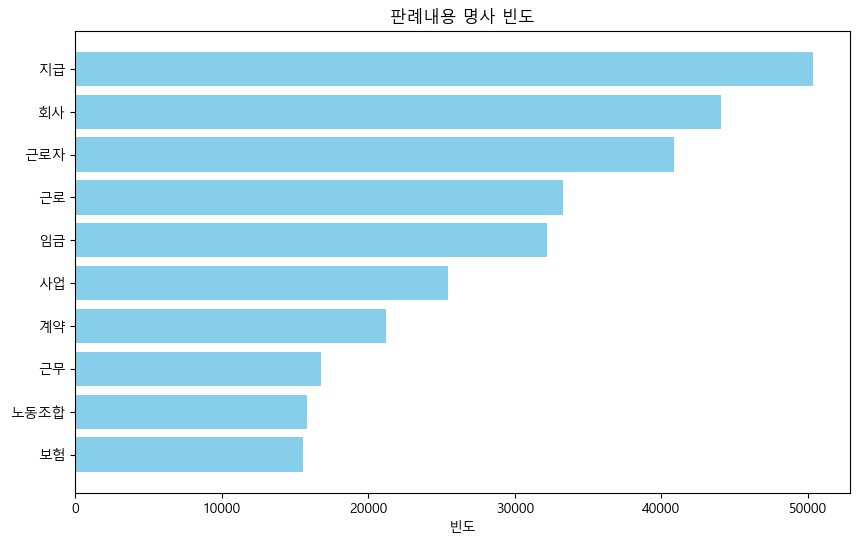

In [6]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt

# 데이터 리스트 만들기
data_list = df_labor['판례내용_제거(불용어)'].copy()

# 명사 추출
docs_list = []

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))

# 명사를 리스트로 결합
all_nouns = ' '.join(docs_list)

# 명사 빈도 세기
noun_counts = Counter(all_nouns.split())

# 데이터프레임으로 변환
df_noun_counts = pd.DataFrame(noun_counts.items(), columns=['noun', 'count'])
df_noun_counts = df_noun_counts.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts['noun'][:10], df_noun_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판례내용 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로 정렬
plt.show()


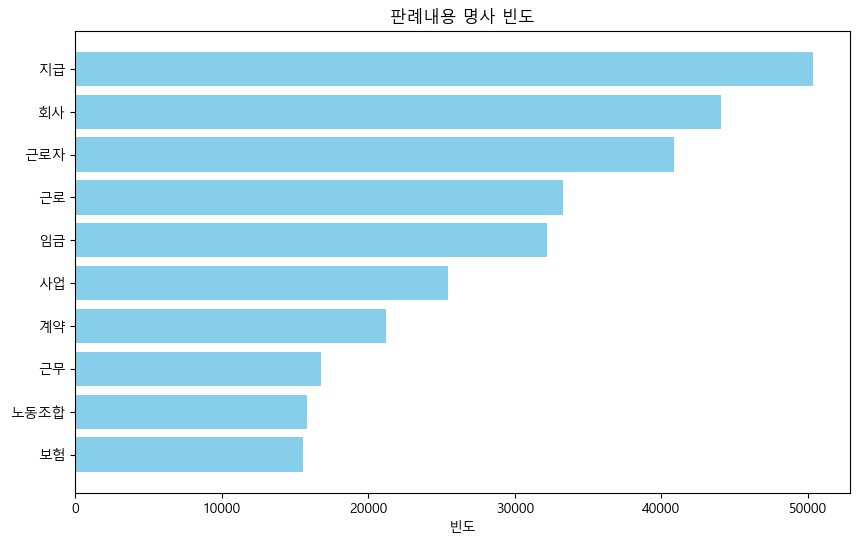

In [27]:
#2글자이상 명사비교

#명사추출
docs_list2 =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    # 길이가 1보다 큰 명사이면서 불용어가 아닌 것만 필터링
    filter_nouns = [noun for noun in nouns if len(noun) > 1]
    docs_list2.append(' '.join(filter_nouns))

# 명사를 리스트로 결합
all_nouns2 = ' '.join(docs_list2)

# 명사 빈도 세기
noun_counts2 = Counter(all_nouns2.split())

# 데이터프레임으로 변환
df_noun_counts2 = pd.DataFrame(noun_counts2.items(), columns=['noun', 'count'])
df_noun_counts2 = df_noun_counts2.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts2['noun'][:10], df_noun_counts2['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판례내용 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

### 형태소 분포

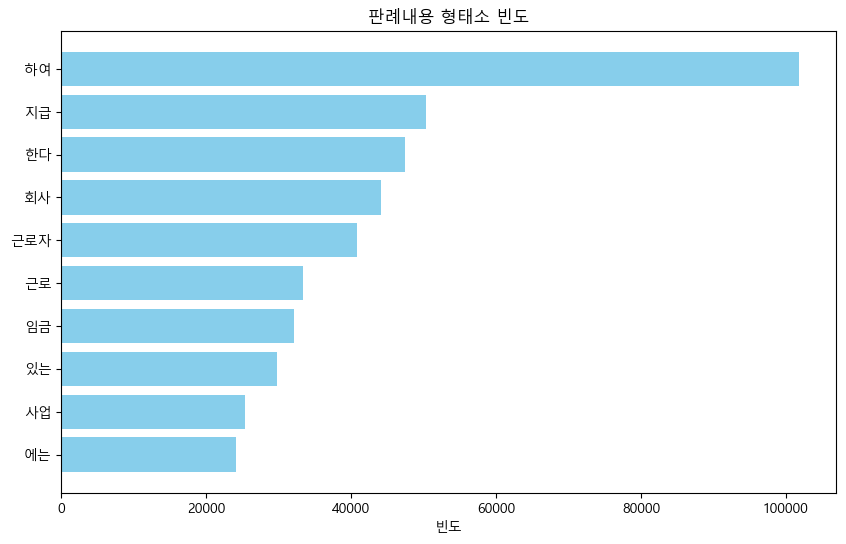

In [28]:
# 형태소 분석
docs_list3 = []
okt = Okt()
for text in data_list:
    morphemes = okt.morphs(text)  # 모든 형태소 추출
    docs_list3.append(' '.join(morphemes))

# 형태소 문자열로 결합
all_morphemes = ' '.join(docs_list3)

# 형태소 빈도 세기
morpheme_counts = Counter(all_morphemes.split())

# 데이터프레임으로 변환
df_morpheme_counts = pd.DataFrame(morpheme_counts.items(), columns=['morpheme', 'count'])
df_morpheme_counts = df_morpheme_counts.sort_values(by='count', ascending=False)

# 빈도 시각화 (상위 10개 형태소)
plt.figure(figsize=(10, 6))
plt.barh(df_morpheme_counts['morpheme'][:10], df_morpheme_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판례내용 형태소 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

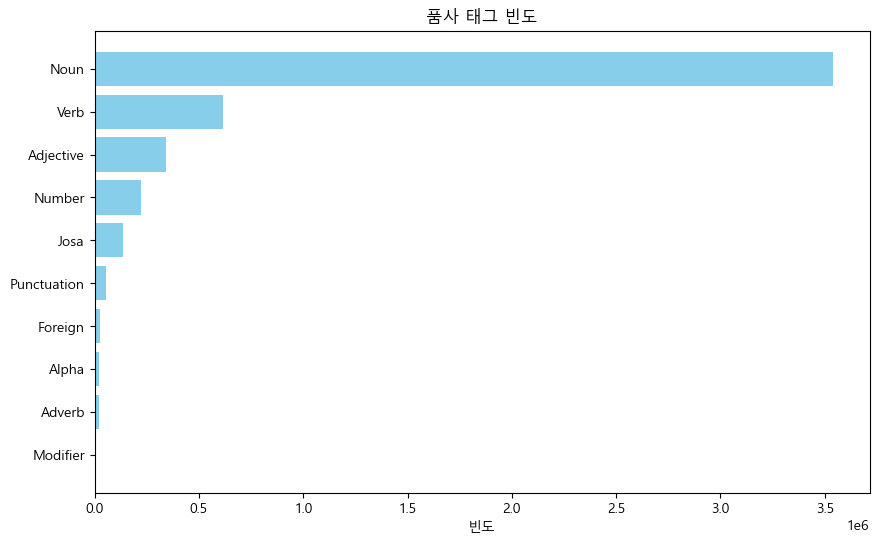

In [29]:
#형태소 품사태그확인
tag_list = []
okt = Okt()
for text in data_list:
    pos_tags = okt.pos(text)
    tags = [tag for _, tag in pos_tags]
    tag_list.extend(tags)

# 품사 태그 빈도 세기
tag_counts = Counter(tag_list)

# 데이터프레임으로 변환
df_tag_counts = pd.DataFrame(tag_counts.items(), columns=['tag', 'count'])
df_tag_counts = df_tag_counts.sort_values(by='count', ascending=False)

# 빈도 시각화 (상위 10개 품사 태그)
plt.figure(figsize=(10, 6))
plt.barh(df_tag_counts['tag'][:10], df_tag_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('품사 태그 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

In [ ]:
N-gram

In [19]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [21]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례정보일련번호      5016 non-null   int64 
 1   사건번호          5016 non-null   object
 2   선고            5016 non-null   object
 3   판결유형          5016 non-null   object
 4   판시사항          3725 non-null   object
 5   판결요지          3054 non-null   object
 6   참조조문          3724 non-null   object
 7   참조판례          2450 non-null   object
 8   판례내용          5016 non-null   object
 9   판례내용_상단       5016 non-null   object
 10  판례내용_이유       5012 non-null   object
 11  판례내용_이유(전처리)  5016 non-null   object
dtypes: int64(1), object(11)
memory usage: 470.4+ KB


In [15]:
data_list = df_labor2['판례내용_제거(불용어)'].copy()

In [16]:
#위에 명사추출이랑 같음
docs_list4 =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list4.append(' '.join(nouns))

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def process_in_chunks(docs_list4, ngram_range=(1, 1), max_features=None, chunk_size=200):
    df_list = []  # 결과를 저장할 리스트
    vect = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
    
    # 데이터셋을 청크로 나누어 처리
    for i in range(0, len(docs_list4), chunk_size):
        chunk = docs_list4[i:i + chunk_size]
        dtm_chunk = vect.fit_transform(chunk)  # 희소 행렬로 유지
        vocab_chunk = vect.get_feature_names_out()
        
        # 희소 행렬을 데이터프레임으로 변환 (toarray()를 사용하지 않고 처리)
        df_chunk = pd.DataFrame.sparse.from_spmatrix(dtm_chunk, columns=vocab_chunk)
        df_list.append(df_chunk)
    
    # 모든 청크를 하나의 데이터프레임으로 결합
    return pd.concat(df_list, ignore_index=True)

# 1-gram 처리 (단어 수 제한, 메모리 문제 방지)
df_1gram = process_in_chunks(docs_list4, ngram_range=(1, 1))

# 결과 출력
print("1-gram")
print(df_1gram)

1-gram
       가가  가건물   가게  가격   가결  가계약   가공   가관   가급  가까이  ...   파훼   피몽  한노총  \
0     0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
1     0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
2     0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
3     0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
4     0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0  0.0  ...  NaN  NaN  NaN   
...   ...  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5011  NaN  NaN  NaN   0  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0  0.0  0.0   
5012  NaN  NaN  NaN   0  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0  0.0  0.0   
5013  NaN  NaN  NaN   1  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.0  0.0  0.0   
5014  NaN  NaN  NaN   0  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  0.0  2.0   
5015  NaN  NaN  NaN   0  NaN  NaN  NaN  NaN  NaN  NaN  ...  1.0  0.0  0.0   

      합송리   해금   혈표   형행   혹종  황무지   회뢰  
0     NaN  NaN  NaN  NaN  

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def process_in_chunks(docs_list4, ngram_range=(1, 1), max_features=None, chunk_size=10):
    df_list = []  # 결과를 저장할 리스트
    vect = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
    
    # 데이터셋을 청크로 나누어 처리
    for i in range(0, len(docs_list4), chunk_size):
        chunk = docs_list4[i:i + chunk_size]
        dtm_chunk = vect.fit_transform(chunk)  # 희소 행렬로 유지
        vocab_chunk = vect.get_feature_names_out()
        
        # 희소 행렬을 데이터프레임으로 변환 (toarray()를 사용하지 않고 처리)
        df_chunk = pd.DataFrame.sparse.from_spmatrix(dtm_chunk, columns=vocab_chunk)
        df_list.append(df_chunk)
    
    # 모든 청크를 하나의 데이터프레임으로 결합
    return pd.concat(df_list, ignore_index=True)

# 2-gram 처리 (단어 수 제한, 메모리 문제 방지)
df_2gram = process_in_chunks(docs_list4, ngram_range=(2, 2))

# 결과 출력
print("2-gram")
print(df_2gram)

MemoryError: Unable to allocate 7.95 MiB for an array with shape (1041936,) and data type int64

In [18]:
### 변경 전 메모리 부족으로 오류 발생 
### 최대 단위 수 지정

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#1-gram
vect = CountVectorizer() 
dtm = vect.fit_transform(docs_list4).toarray()
vocab = vect.get_feature_names_out()
df_1gram = pd.DataFrame(dtm, columns=vocab)

#2-gram
vect_2gram = CountVectorizer(ngram_range=(2, 2))
dtm_2gram = vect_2gram.fit_transform(docs_list4).toarray()
vocab_2gram = vect_2gram.get_feature_names_out()
df_2gram = pd.DataFrame(dtm_2gram, columns=vocab_2gram)

#3-gram 
vect_3gram = CountVectorizer(ngram_range=(3, 3))
dtm_3gram = vect_3gram.fit_transform(docs_list4).toarray()
vocab_3gram = vect_3gram.get_feature_names_out()
df_3gram = pd.DataFrame(dtm_3gram, columns=vocab_3gram)

print("1-gram")
print(df_1gram)

print("2-gram")
print(df_2gram)

print("3-gram")
print(df_3gram)

MemoryError: Unable to allocate 38.9 GiB for an array with shape (5016, 1041936) and data type int64

In [ ]:
# 빈도수 시각화 함수
def plot_top_n(df, title, n=None):
    # 각 n-gram의 빈도 계산
    freq = df.sum().sort_values(ascending=False).head(n)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(freq.index, freq.values, color='skyblue')
    plt.xlabel('빈도')
    plt.title(title)
    plt.gca().invert_yaxis()  # 빈도순으로
    plt.show()

# 상위 20개 빈도 시각화
plot_top_n(df_1gram, '1-gram 빈도',20)
plot_top_n(df_2gram, '2-gram 빈도',20)
plot_top_n(df_3gram, '3-gram 빈도',20)

### TF-IDF, 워크클라우드(문서의 핵심단어)

In [ ]:
#위에 명사추출이랑 같음
docs_list5 =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list5.append(' '.join(nouns))

In [ ]:
#TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=vocab)
tfidf = tfidfv.fit_transform(docs_list5).toarray()
pd.DataFrame(tfidf, columns=vocab)

In [ ]:
#TF-IDF중요단어추출

import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
topics =[]
n_top = 10
for line in tfidf_order:
  topic = [vocab[x] for x in line[:n_top]]
  topics.append(topic)
df = pd.DataFrame(topics)
df

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_from_tfidf(tfidf, vocab):
    # 단어별 TF-IDF 값을 저장할 딕셔너리
    word_freq = {}
    
    # 모든 문서의 TF-IDF 값을 합산
    for i in range(tfidf.shape[0]):
        for j in range(tfidf.shape[1]):
            if tfidf[i, j] > 0:  # TF-IDF 값이 0보다 클 때만
                word = vocab[j]  # 단어
                if word in word_freq:
                    word_freq[word] += tfidf[i, j]  # 기존 값에 추가
                else:
                    word_freq[word] = tfidf[i, j]  # 새로 추가
    
    # 워드클라우드 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
                    width=800,
                    height=400,
                    background_color='white',
                    prefer_horizontal=0.8,
                    random_state=42,
                    colormap='viridis').generate_from_frequencies(word_freq)
    

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('워드클라우드')
    plt.show()

# 전체 문서에 대한 워드클라우드 시각화
plot_wordcloud_from_tfidf(tfidf, vocab)

사건종류 분포

In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path1 = r'C:\Users\82102\Downloads\새 폴더 (2)\lawSearch_jh.csv' #해당하는 경로로 변경
csv_file_path2 = r'C:\Users\82102\Downloads\새 폴더 (2)\lawService_jh.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df_search = pd.read_csv(csv_file_path1)
df_service = pd.read_csv(csv_file_path2)

df_filtered = df_service[df_service.apply(lambda row: row.astype(str).str.contains('상속').any(), axis=1)]
matching_df = df_search[df_search['사건번호'].isin(df_filtered['사건번호'])]

# 불러온 데이터 확인
print(matching_df.head())

In [ ]:
matching_df.info()

In [ ]:
df_filtered.info()

In [ ]:
df_filtered.info()

In [ ]:
case_counts = matching_df['사건종류명'].value_counts()

plt.figure(figsize=(10, 6))
case_counts.plot(kind='bar', color='skyblue')
plt.xlabel('사건종류명')
plt.ylabel('빈도수')
plt.title('사건종류명 빈도수')
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 조정
plt.show()

### 심급빈도

# 심급빈도
matching_df['법원명'].value_counts()

In [ ]:
# 법원명카운트(3심과 관련없는 가정법원은 포함하지않았음)
supreme_count = matching_df[matching_df['법원명'].str.contains('대법원', na=False)].shape[0]
high_count = matching_df[matching_df['법원명'].str.contains('고등', na=False)].shape[0]
local_count = matching_df[matching_df['법원명'].str.contains('지방', na=False)].shape[0]

print('상속:',supreme_count,high_count,local_count)

# 전체 법원명카운트
total_supreme_count = df_search[df_search['법원명'].str.contains('대법원', na=False)].shape[0]
total_high_count = df_search[df_search['법원명'].str.contains('고등', na=False)].shape[0]
total_local_count = df_search[df_search['법원명'].str.contains('지방', na=False)].shape[0]

print('전체:',total_supreme_count,total_high_count,total_local_count)

In [ ]:
court_types = ['대법원', '고등법원', '지방법원']
court_counts = [supreme_count, high_count, local_count]
total_counts = [total_supreme_count, total_high_count, total_local_count]

# 바그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(court_types, total_counts, width=0.4, label='전체', color='lightgrey', alpha=0.7)
plt.bar(court_types, court_counts, width=0.4, label='상속', color='salmon', alpha=0.7)

plt.ylabel('빈도수')
plt.title('법원 종류별 카운트')
plt.legend()
plt.tight_layout()  # 레이아웃 조정
plt.show()